# **Project Description**

**Pre-requisites**
Create a new GitHub repository for this project. Please make sure that the repository is public, or alternatively, you can add me (@numadhamani) as a contributor if you would like to keep it private. If this is your first time using GitHub, here are some helpful docs: https://guides.github.com/
Navigate to the Datasets folder and download movies_data.csv.

**Overview**
You are a Data Scientist for a top movie studio. After a series of box office flops, the producers of your studio are starting to question their strategy and need some direction. You suggest a new approach - using data to determine what factors go into making a successful film. Luckily, you have a dataset of over 5000 films to mine for insights. Your producers ask you to spend some time analyzing the data and present a report detailing your findings, along with recommendations on how to revamp the studio’s strategy. 

**Deliverables**

*Code committed to the GitHub repository that you used to do this analysis. This
can be in the form of a script with comments or a Jupyter Notebook. 

*A brief report of presentation (PDF or Google Doc/Slides) detailing your analysis and recommendations, with data visualizations where appropriate. Include details on your thought process and any assumptions or choices you made in the analysis. 




# **Introduction**

After a series of Box Office flops, the studio recognized the need for a change in direction. Using a sample of 5043 movies, we are asked to identify determinants of a successful movie, as well as to make future recommendations. This study's aim is to define key correlations between determinants, explore their relevance, and make recommendations on how they can be used to improve Box Office performances.

**Imports**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files

**Loading data**

In [ ]:
#from a local machine using google colab files

movies_uploaded = files.upload()

Saving movie_data.csv to movie_data.csv


In [ ]:
movies = pd.read_csv('movie_data.csv')

# **Initial EDA**

- **Number of entries** : There are a total of 5043 entries. 
- **Number of features and their types**: There are a total of 26 features with types: float64(12), int64(3), object(11)
- **Scale**: Scales differ greatly, namely *gross* and *budget* in comparison to other features.
- **Missing values:** total of 2685 missing values, highest % of missing values are the target value '*gross*' 17.52%, followed by '*budget*' 9.75%.
- **Duplicate rows**: There are total of 247 duplicated rows.
- **Categorical features**: color, director_name, actor_1_name, actor_2_name, actor_3_name, genres, movie_title, plot_keywords, language, country, content_rating
- **Numerical features**: num_critic_reviews, duration, director_facebook_likes, actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes, gross, num_users_voted, cast_total_facebook_likes, num_user_reviews, budget, title_year, movie_score, aspect_ratio, movie_facebook_likes

In [ ]:
movies.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_reviews         4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_users_voted            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
movies.shape

(5043, 26)

In [ ]:
#exploring null values

print('Number of missing values: ', movies.isnull().values.sum())
print('Percent of missing values per feature: ', movies.isnull().sum() * 100 / len(movies))

Number of missing values:  2685
Percent of missing values per feature:  color                         0.376760
director_name                 2.062265
num_critic_reviews            0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_users_voted               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
plot_keywords                 3.033908
num_user_reviews              0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
movie_score                   0

In [ ]:
#checking for duplicate rows

duplicate = movies[movies.duplicated('movie_title', keep=False)]
duplicate


,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,sandman|spider man|symbiote|venom|villain,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,alien invasion|assassin|battle|iron man|soldier,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
25,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,Naomi Watts,King Kong,316018,7123,Evan Parke,animal name in title|ape abducts a woman|goril...,2618.0,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0
30,Color,Sam Mendes,750.0,143.0,0.0,393.0,Helen McCrory,883.0,304360277.0,Action|Adventure|Thriller,Albert Finney,Skyfall,522030,2039,Rory Kinnear,brawl|childhood home|computer cracker|intellig...,1498.0,English,UK,PG-13,200000000.0,2012.0,563.0,7.8,2.35,80000
33,Color,Tim Burton,451.0,108.0,13000.0,11000.0,Alan Rickman,40000.0,334185206.0,Adventure|Family|Fantasy,Johnny Depp,Alice in Wonderland,306320,79957,Anne Hathaway,alice in wonderland|mistaking reality for drea...,736.0,English,USA,PG,200000000.0,2010.0,25000.0,6.5,1.85,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,Christopher Judge,A Dog's Breakfast,3262,2364,Paul McGillion,dog|vegetarian,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
4950,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,Christopher Judge,A Dog's Breakfast,3262,2364,Paul McGillion,dog|vegetarian,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
4951,Black and White,George A. Romero,284.0,96.0,0.0,56.0,Duane Jones,125.0,NaN,Drama|Horror|Mystery,Judith O'Dea,Night of the Living Dead,87978,403,S. William Hinzman,cemetery|farmhouse|radiation|running out of ga...,580.0,English,USA,Unrated,114000.0,1968.0,108.0,8.0,1.85,0
4971,Color,Dennis Iliadis,241.0,114.0,29.0,616.0,Monica Potter,956.0,32721635.0,Crime|Horror|Thriller,Tony Goldwyn,The Last House on the Left,67824,3861,Martha MacIsaac,kidnapping|lake|microwave oven|psychopath|woods,279.0,English,USA,R,15000000.0,2009.0,878.0,6.6,1.85,0


**Exploring categorical features**

In [ ]:
cat_movies = movies.select_dtypes(include=['object'])
cat_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   color           5024 non-null   object
 1   director_name   4939 non-null   object
 2   actor_2_name    5030 non-null   object
 3   genres          5043 non-null   object
 4   actor_1_name    5036 non-null   object
 5   movie_title     5043 non-null   object
 6   actor_3_name    5020 non-null   object
 7   plot_keywords   4890 non-null   object
 8   language        5031 non-null   object
 9   country         5038 non-null   object
 10  content_rating  4740 non-null   object
dtypes: object(11)
memory usage: 433.5+ KB


In [ ]:
movies['country'].value_counts()

USA         3807
UK           448
France       154
Canada       126
Germany       97
            ... 
Bulgaria       1
Kenya          1
Cameroon       1
Bahamas        1
Aruba          1
Name: country, Length: 65, dtype: int64

In [ ]:
cat_movies['color'].value_counts()

Color              4815
Black and White     209
Name: color, dtype: int64

In [ ]:
movies['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Swedish          5
Hebrew           5
Danish           5
Arabic           5
Polish           4
Persian          4
Dutch            4
Norwegian        4
Thai             3
Chinese          3
Indonesian       2
Dari             2
Aboriginal       2
Icelandic        2
Romanian         2
None             2
Zulu             2
Urdu             1
Bosnian          1
Aramaic          1
Panjabi          1
Kannada          1
Kazakh           1
Hungarian        1
Maya             1
Vietnamese       1
Dzongkha         1
Czech            1
Tamil            1
Slovenian        1
Telugu           1
Filipino         1
Swahili          1
Mongolian        1
Greek            1
Name: language, dtype: int64

In [ ]:
cat_movies['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

**Initial data visualization**

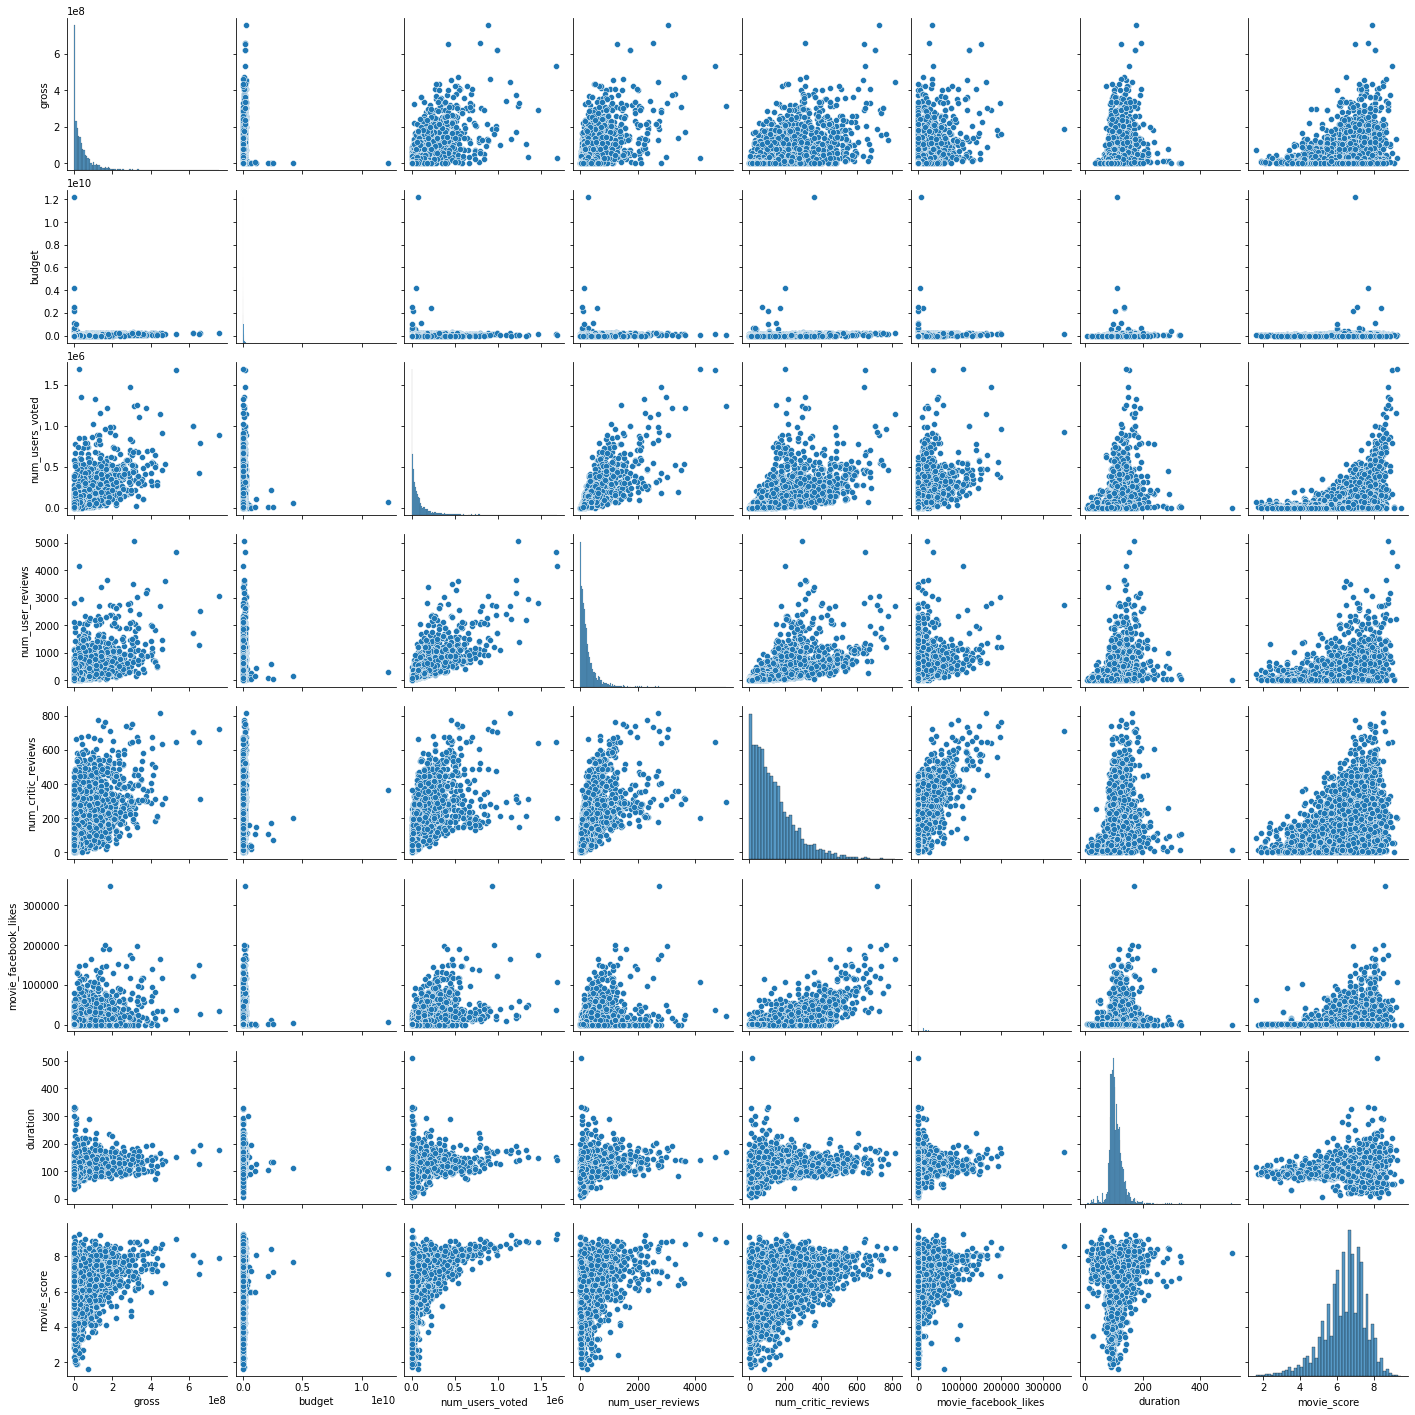

In [ ]:
attributes = ['gross', 'budget','num_users_voted', 'num_user_reviews', 'num_critic_reviews', 'movie_facebook_likes', 'duration', 'movie_score']
sns.pairplot(movies[attributes])

In [ ]:
#creating additional budget and gross features expressed in millions for the sake of easier visualizatin and interpretation

#converting budget to million

movies['budget ($) millions'] = (movies['budget'].astype(float)/1000000).round(2)

#converting gross to million

movies['gross ($) millions'] = (movies['gross'].astype(float)/1000000).round(2)
movies.head(1)

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237.0,760.51


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


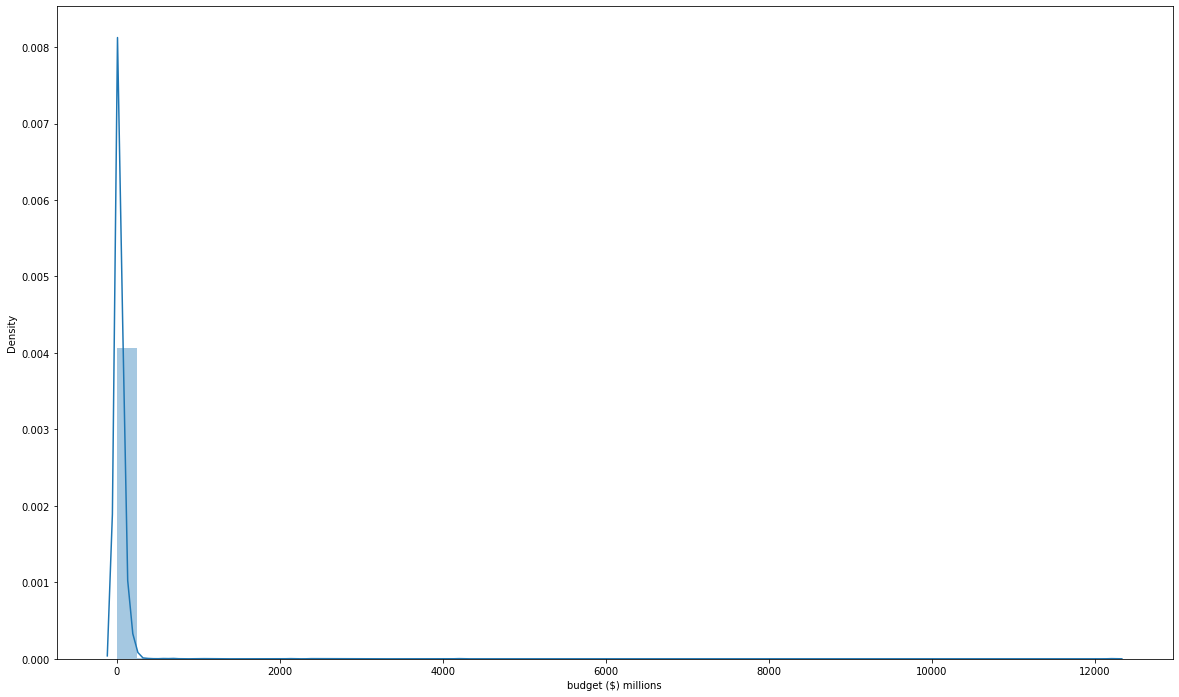

In [ ]:
#plotting budget

f, ax = plt.subplots(figsize=(20,12))
sns.distplot(movies['budget ($) millions'],ax=ax)

In [ ]:
# exploring outliers and identifying if the currency between gross and budget matches

budget_over_250 = movies[movies['budget ($) millions'] > 250]
budget_over_250[['country', 'language','movie_title', 'budget ($) millions', 'gross ($) millions']].sort_values('budget ($) millions', ascending=False)

,country,language,movie_title,budget ($) millions,gross ($) millions
2988,South Korea,Korean,The Host,12215.50,2.20
3859,South Korea,Korean,Lady Vengeance,4200.00,0.21
3005,Hungary,Hungarian,Fateless,2500.00,0.20
2323,Japan,Japanese,Princess Mononoke,2400.00,2.30
2334,Japan,Japanese,Steamboy,2127.52,0.41
3423,Japan,Japanese,Akira,1100.00,0.44
4542,Japan,Japanese,Godzilla 2000,1000.00,10.04
3075,India,Hindi,Kabhi Alvida Naa Kehna,700.00,3.28
3851,Spain,Spanish,Tango,700.00,1.69
3273,India,English,Kites,600.00,1.60


# **Data Preparation**

**Creating two new features: *profit* and *roi***

- For the sake of exploration and clarity, two new features will be added to the dataset: profit and roi.
- *Profit* is calculated by subtracting the production cost (in this case budget) by the total amount earned (gross).
- *Roi* is calculated by subtracting the budget by net profit, and multiplying it by 100. The resulting amount is in %.

In [ ]:
#creating a new column profit (gross - budget)

movies['profit'] = movies['gross'] - movies['budget']

In [ ]:
#creating a new column roi (net profit / budget * 100)

movies['roi'] = movies['profit']/movies['budget'] * 100

**Preparing the *genre* feature**
- The genre feature is dtype object, containing over 200 unique values. The format of the object is multiple strings. 
- **Action taken**: I've split the multiple strings, and kept the first one, as it is the most relevant to the genre of the movie, others are descriptive of the elements found in the movie.
- The genre feature will be used for exploration of its relationship with profit/gross, and as such it will need to be reduced to couple of most promising genres, such as comedy, action, adventure and drama. 

In [ ]:
#exploding the genres feature, keeping the first value

movies_new = pd.DataFrame(movies.genres.str.split('|').to_list())
movies_new.head()


,0,1,2,3,4,5,6,7
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
4,Documentary,None,None,None,None,None,None,None


In [ ]:
print(movies_new.shape)
print(movies.shape)

(5043, 8)
(5043, 30)


In [ ]:
movies['genres'] = movies_new[0]
movies.head(1)

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions,profit,roi
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,237.0,760.51,523505847.0,220.888543


In [ ]:
movies['genres'].value_counts()

Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
History           1
Game-Show         1
Music             1
Film-Noir         1
Name: genres, dtype: int64

In [ ]:
movies[['movie_title', 'genres', 'profit', 'roi']].sort_values(by='profit', ascending=False)[:10]

,movie_title,genres,profit,roi
0,Avatar,Action,523505847.0,220.888543
29,Jurassic World,Action,502177271.0,334.784847
26,Titanic,Drama,458672302.0,229.336151
3024,Star Wars: Episode IV - A New Hope,Action,449935665.0,4090.324227
3080,E.T. the Extra-Terrestrial,Family,424449459.0,4042.375800
794,The Avengers,Action,403279547.0,183.308885
17,The Avengers,Action,403279547.0,183.308885
509,The Lion King,Adventure,377783777.0,839.519504
240,Star Wars: Episode I - The Phantom Menace,Action,359544677.0,312.647545
66,The Dark Knight,Action,348316061.0,188.278952


**Keeping only the English speaking movies**

- Initial exploration identified huge outliers in the budget value, which was identified as a currency from the country of origin. 
- All USA movies appear to have the same curency: US dollar.
- All non-USA English speaking countries (New Zealand, UK, Australia etc.) appear to have their budgets expressed in US dollars.
- **Action taken** : removed all foreign languages, and kept the English language.

In [ ]:
movies = movies[movies.language == 'English']

In [ ]:
movies['language'].value_counts()

English    4704
Name: language, dtype: int64

**Removing duplicate rows**

In [ ]:
#removing duplicate rows based on the 'movie_title' column

movies.drop_duplicates(subset=['movie_title'], keep=False, inplace=True)

In [ ]:
print('Data length: ', len(movies))

Data length:  4467


**Dropping NaN**
- There are over 17% of missing values in the target feature *gross*, followed by *budget* 9%.
- **Action taken**: As it is time consuming and potentialy highly unreliable, and I will be using the features most affected for further analysis, I decided to drop all NaN's.

In [ ]:
#dropping all missing values

movies.dropna(inplace=True)

In [ ]:
print('Number of missing values: ', movies.isnull().values.sum())
print('Data lenght: ', len(movies))

Number of missing values:  0
Data lenght:  3411


**Sorting out the invalid budget value**

- An obvious outlier in the budget feature was detected, which after further inspection was identified as false.
- **Action taken** : The false value was replaced with the appropriate value taken from the IMDB website.

In [ ]:
movies[movies['budget'] == 390000000.0]

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget ($) millions,gross ($) millions,profit,roi
1016,Color,Luc Besson,111.0,158.0,0.0,15.0,David Bailie,51.0,14131298.0,Adventure,Paul Brooke,The Messenger: The Story of Joan of Arc,55889,144,Rab Affleck,cathedral|dauphin|france|trial|wartime rape,390.0,English,France,R,390000000.0,1999.0,40.0,6.4,2.35,0,390.0,14.13,-375868702.0,-96.37659


In [ ]:
#removing the invalid budgetvalue and replacing it with the proper one

movies['budget'] = movies['budget'].replace(390000000.0, 60000000.0)

In [ ]:
# updating the budget in millions column

movies['budget ($) millions'] = (movies['budget'].astype(float)/1000000).round(2)

**Removing irrelevant features**
- *Color* - there is no evidence this feature has any relevance to the target feature.
- *Aspect Ratio* - there is no evidence this feature has any relevance to the target feature.
- *Actor 3* - I assume additional cast doesn't have any relevance for future recommendations, so I kept the main two actors, and removed the third one.
- *Actor 3 Facebook Likes* - the reasoning for the removal of this feature matches the one described for removing *Actor 3*
* *Director's Name* - there is no evidence a director's name might influence profit or gross.
- *Director's Facebook Likes* - reasoning is the same as for the director's name
- *Plot Keywords* - this feature contains over 500 unique values. There is no evident method of finding a pattern in such a vast number of values.
- *Country* - Initial exploration identified huge outliers in the budget value, which was identified as a currency from the country of origin. Country feature is removed as all movies with English as their primary language appear to have their budgets expressed in US dollars. All other countries have their currency expressed in the local currency or US dollars, which is hard to identify - therefore country feature was removed.

In [ ]:
#removing irrelevant features

movies.drop(columns=['color', 'aspect_ratio', 'director_name', 'actor_3_name', 'actor_3_facebook_likes','plot_keywords', 'director_facebook_likes', 'country'], inplace=True)

**Reseting the index**

In [ ]:
movies.reset_index(drop=True, inplace=True)
movies.head()

,num_critic_reviews,duration,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,num_user_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,profit,roi
0,723.0,178.0,Joel David Moore,1000.0,760505847.0,Action,CCH Pounder,Avatar,886204,4834,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,33000,237.0,760.51,523505847.0,220.888543
1,302.0,169.0,Orlando Bloom,40000.0,309404152.0,Action,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,1238.0,English,PG-13,300000000.0,2007.0,5000.0,7.1,0,300.0,309.40,9404152.0,3.134717
2,602.0,148.0,Rory Kinnear,11000.0,200074175.0,Action,Christoph Waltz,Spectre,275868,11700,994.0,English,PG-13,245000000.0,2015.0,393.0,6.8,85000,245.0,200.07,-44925825.0,-18.337071
3,813.0,164.0,Christian Bale,27000.0,448130642.0,Action,Tom Hardy,The Dark Knight Rises,1144337,106759,2701.0,English,PG-13,250000000.0,2012.0,23000.0,8.5,164000,250.0,448.13,198130642.0,79.252257
4,462.0,132.0,Samantha Morton,640.0,73058679.0,Action,Daryl Sabara,John Carter,212204,1873,738.0,English,PG-13,263700000.0,2012.0,632.0,6.6,24000,263.7,73.06,-190641321.0,-72.294775


In [ ]:
movies.shape

(3411, 22)

**Creating dummy variables for the *genre* feature**

- The genre feature containg 17 unique values.
- The most promising values to keep are: Action and Comedy
- **Action taken**: Creating 4 new dummy features: Action and Comedy

In [ ]:
movies['genres'].value_counts()

Comedy         946
Action         857
Drama          564
Adventure      340
Crime          231
Biography      198
Horror         143
Animation       41
Fantasy         32
Documentary     23
Mystery         21
Sci-Fi           7
Family           3
Musical          2
Thriller         1
Romance          1
Western          1
Name: genres, dtype: int64

In [ ]:
#converting the genres feature using get_dummies

genre_dummies = pd.get_dummies(movies, prefix=['genres'], columns=['genres'])
genre_dummies.head()

,num_critic_reviews,duration,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,num_user_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,profit,roi,genres_Action,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Horror,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_Western
0,723.0,178.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,33000,237.0,760.51,523505847.0,220.888543,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,302.0,169.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,1238.0,English,PG-13,300000000.0,2007.0,5000.0,7.1,0,300.0,309.40,9404152.0,3.134717,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,994.0,English,PG-13,245000000.0,2015.0,393.0,6.8,85000,245.0,200.07,-44925825.0,-18.337071,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,2701.0,English,PG-13,250000000.0,2012.0,23000.0,8.5,164000,250.0,448.13,198130642.0,79.252257,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,462.0,132.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,738.0,English,PG-13,263700000.0,2012.0,632.0,6.6,24000,263.7,73.06,-190641321.0,-72.294775,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#concatenating new features to the dataset

movies = pd.concat([movies, genre_dummies[['genres_Action', 'genres_Comedy']]], axis=1)

**Creating dummy variables for content_rating**
- Content rating contains 12 unique values.
- Keeping the R - restricted, and PG-13, as it is the two most common ratings, followed by PG rating - which is essentially PG-13. 
- **Action taken**: Creating two new dummy variables: R and PG-13.

In [ ]:
movies['content_rating'].value_counts()

R            1534
PG-13        1189
PG            530
G              83
Not Rated      23
Unrated        17
Approved       16
X               7
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [ ]:
#converting the content_rating feature using get_dummies

content_dummies = pd.get_dummies(movies, prefix=['content_rating'], columns=['content_rating'])
content_dummies.head()

,num_critic_reviews,duration,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,num_user_reviews,language,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,profit,roi,genres_Action,genres_Comedy,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,723.0,178.0,Joel David Moore,1000.0,760505847.0,Action,CCH Pounder,Avatar,886204,4834,3054.0,English,237000000.0,2009.0,936.0,7.9,33000,237.0,760.51,523505847.0,220.888543,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,302.0,169.0,Orlando Bloom,40000.0,309404152.0,Action,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,1238.0,English,300000000.0,2007.0,5000.0,7.1,0,300.0,309.40,9404152.0,3.134717,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,602.0,148.0,Rory Kinnear,11000.0,200074175.0,Action,Christoph Waltz,Spectre,275868,11700,994.0,English,245000000.0,2015.0,393.0,6.8,85000,245.0,200.07,-44925825.0,-18.337071,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,813.0,164.0,Christian Bale,27000.0,448130642.0,Action,Tom Hardy,The Dark Knight Rises,1144337,106759,2701.0,English,250000000.0,2012.0,23000.0,8.5,164000,250.0,448.13,198130642.0,79.252257,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,462.0,132.0,Samantha Morton,640.0,73058679.0,Action,Daryl Sabara,John Carter,212204,1873,738.0,English,263700000.0,2012.0,632.0,6.6,24000,263.7,73.06,-190641321.0,-72.294775,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#concatenating new features to the dataset

movies = pd.concat([movies, content_dummies[['content_rating_PG-13', 'content_rating_R']]], axis=1)

In [ ]:
movies.head(1)

,num_critic_reviews,duration,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,num_user_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,profit,roi,genres_Action,genres_Comedy,content_rating_PG-13,content_rating_R
0,723.0,178.0,Joel David Moore,1000.0,760505847.0,Action,CCH Pounder,Avatar,886204,4834,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,33000,237.0,760.51,523505847.0,220.888543,1,0,1,0


# **Exploratory Data Analysis**

**Exploring *gross***

- Mean value is 53.06M US dollars
- Median value is 30.98M US dollars
- Mean value is in the 60 percentile
- There is an obvious rightward skew: Gross skewness score:  2.96

**Correlations**

- budget                       0.636765
- num_users_voted              0.627451
- num_user_reviews             0.546377
- num_critic_reviews           0.451103
- movie_facebook_likes         0.348581
- duration                     0.255939
- movie_score                  0.253057

**Top 12 movies by *gross*:**
- Highest grossing movie is Avatar with 760.51M US dollars gross, with a budget of 237M US dollars (220% roi)
- Lowest grossing movie is Skin Trade with 162 US dollars gross, 9M budget and roi -99.99%
- Mean value is 513.86M
- Median value is 459.96M
- Average roi is 840.5%.
- Highest roi in the top 12 are: Star Wars: Episode IV - A New Hope with a roi of 4090.32, and E.T. the Extra-Terrestrial with roi of 4042.37.
- Lowest roi in the top 12 are: The Dark Knight Rises with a roi of 79.25%,and Avengers: Age of Ultron roi 83.59%
- 8 Action movies, rest: Adventure, Drama, Family

In [ ]:
movies['gross ($) millions'].describe()

count    3411.000000
mean       53.060504
std        68.988365
min         0.000000
25%         9.595000
50%        30.980000
75%        68.285000
max       760.510000
Name: gross ($) millions, dtype: float64

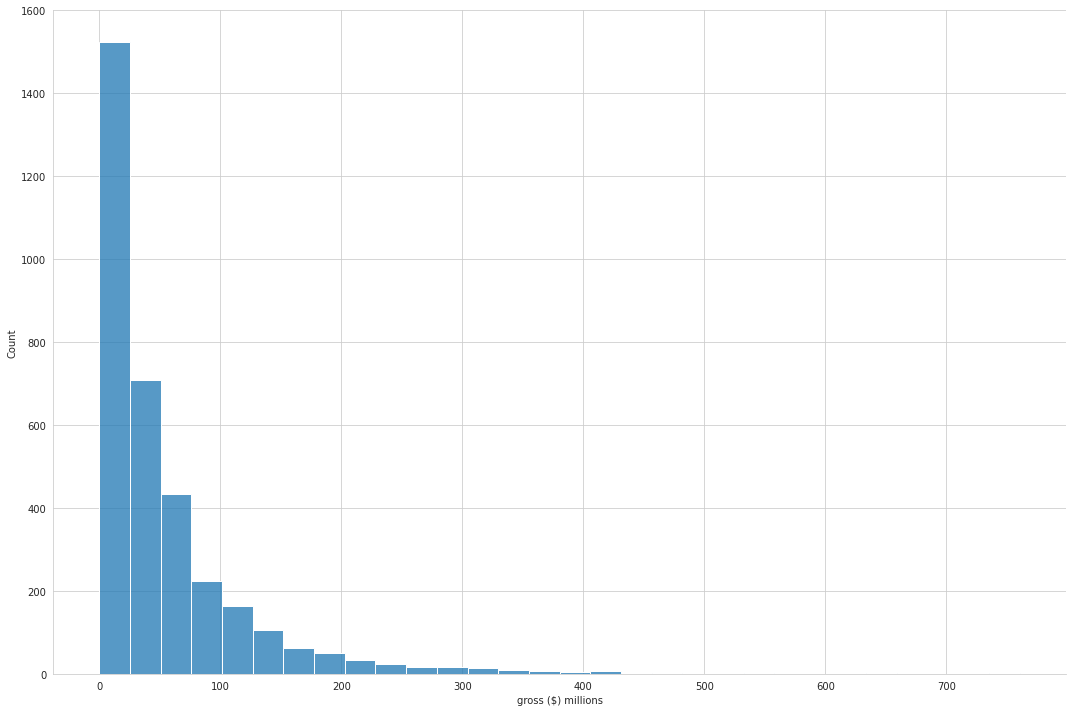

In [ ]:
# visualizing gross distribution

sns.displot(data = movies, x='gross ($) millions', bins=30, height=10, aspect=1.5)

In [ ]:
print('Gross skewness score: ', movies['gross'].skew())

Gross skewness score:  2.9632919427866153


In [ ]:
#exploring 'gross' feature and its correlations

corr_matrix = movies.corr()
corr_matrix['gross'].sort_values(ascending=False)

gross                        1.000000
gross ($) millions           1.000000
profit                       0.792496
budget ($) millions          0.636765
budget                       0.636765
num_users_voted              0.627451
num_user_reviews             0.546377
num_critic_reviews           0.451103
movie_facebook_likes         0.348581
duration                     0.255939
movie_score                  0.253057
actor_2_facebook_likes       0.212486
genres_Action                0.207080
cast_total_facebook_likes    0.198745
content_rating_PG-13         0.156368
actor_1_facebook_likes       0.124491
title_year                   0.041352
roi                          0.019712
genres_Comedy               -0.118085
content_rating_R            -0.252483
Name: gross, dtype: float64

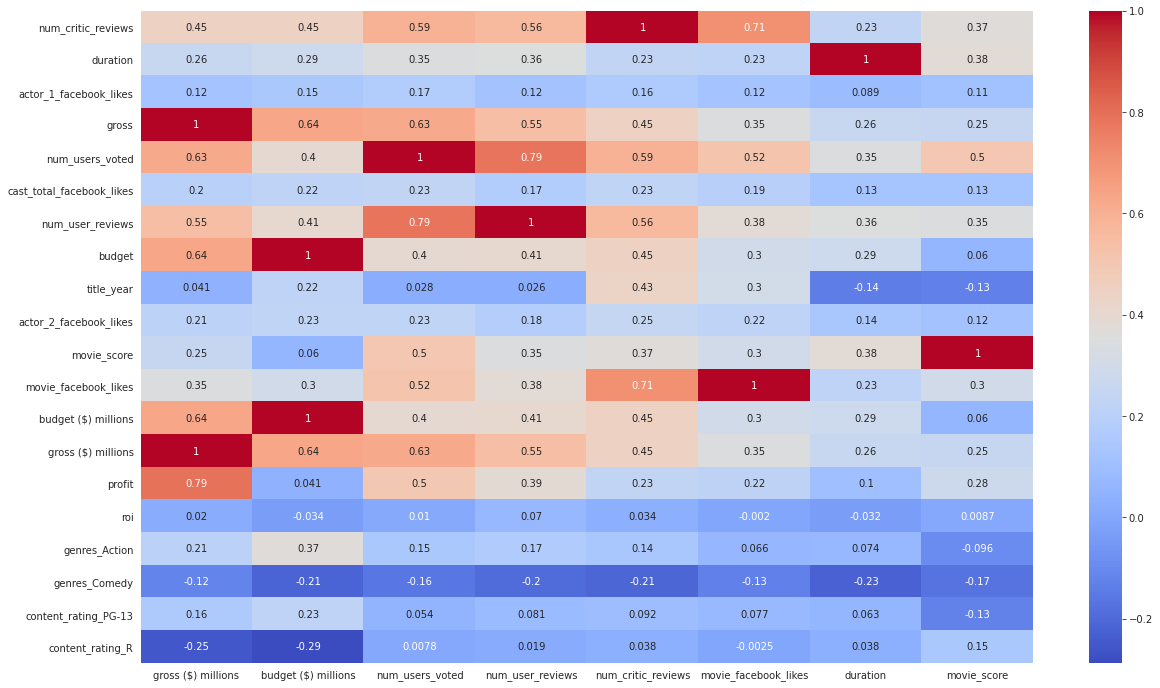

In [ ]:
# visualizing promising correlations using a heatmap

attributes = ['gross ($) millions', 'budget ($) millions','num_users_voted', 'num_user_reviews', 'num_critic_reviews', 'movie_facebook_likes', 'duration', 'movie_score']

f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix[attributes], annot=True, ax=ax, cmap='coolwarm')

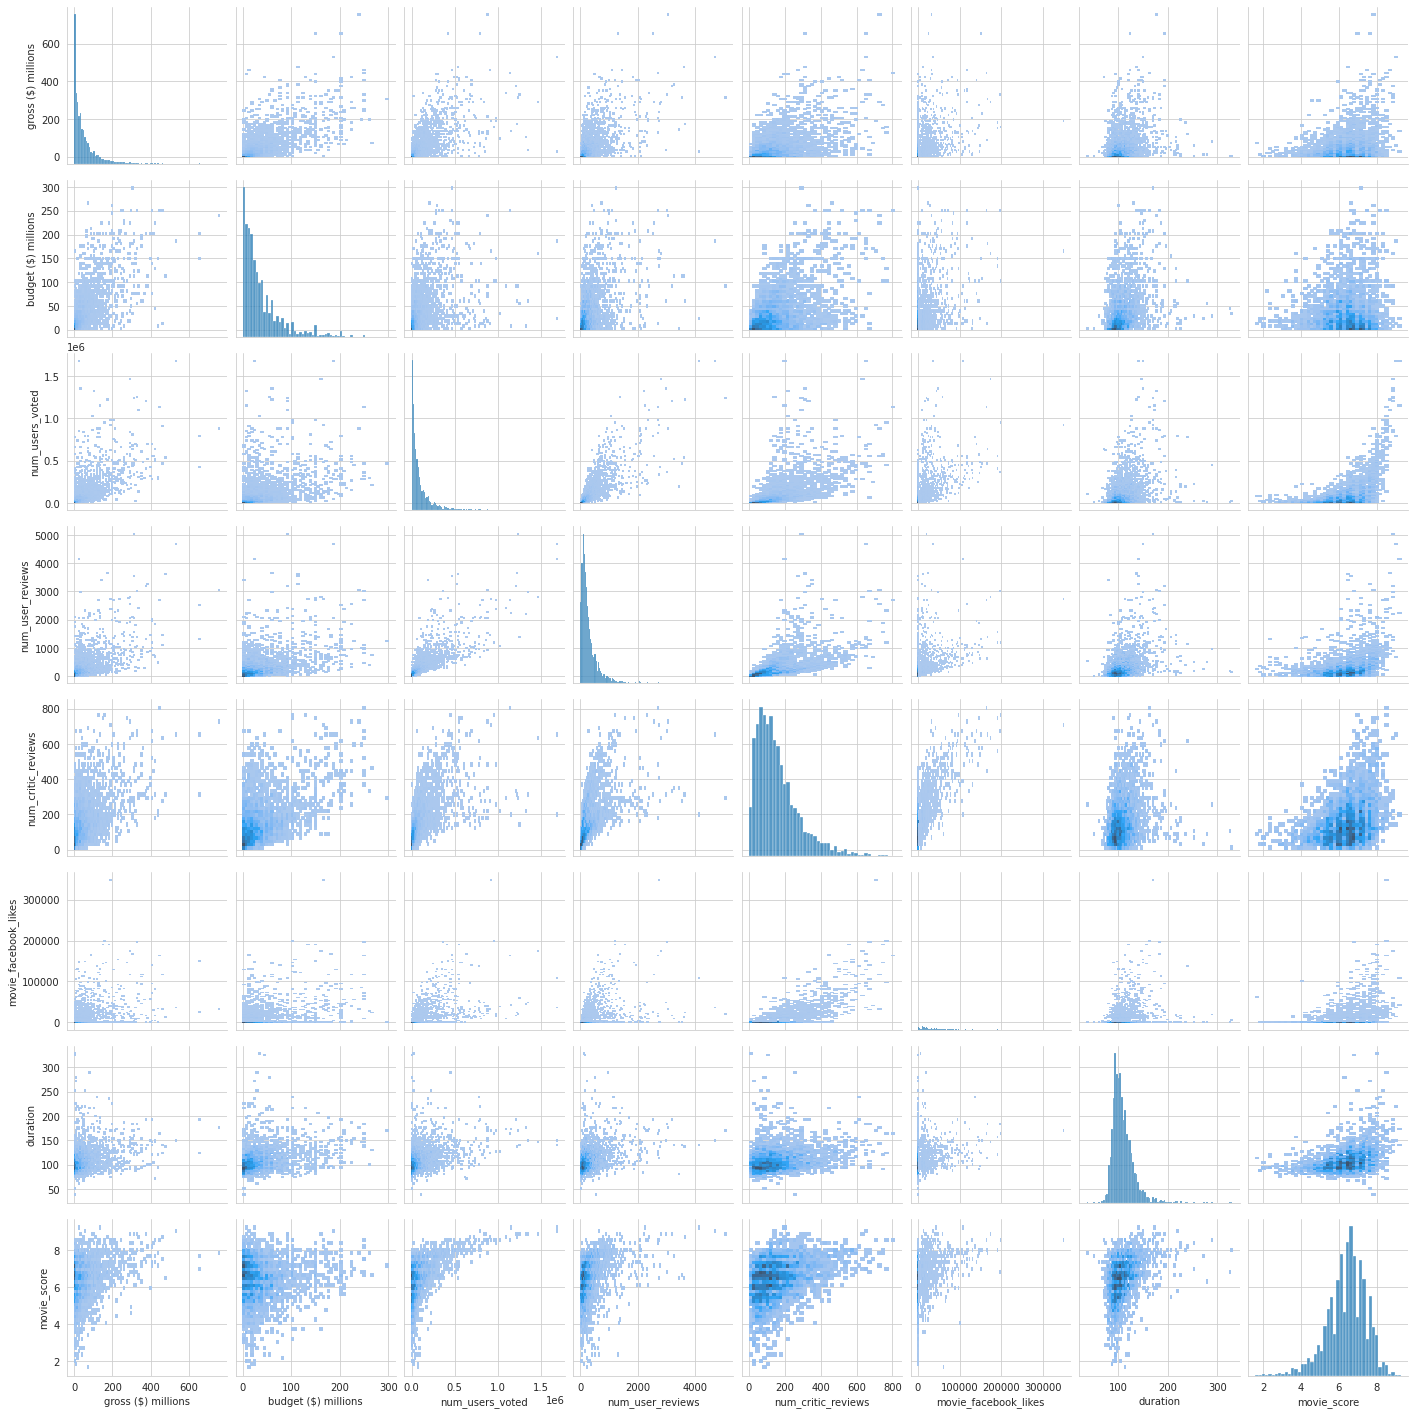

In [ ]:
#visualizing relationships 

sns.pairplot(movies[attributes], kind='hist')

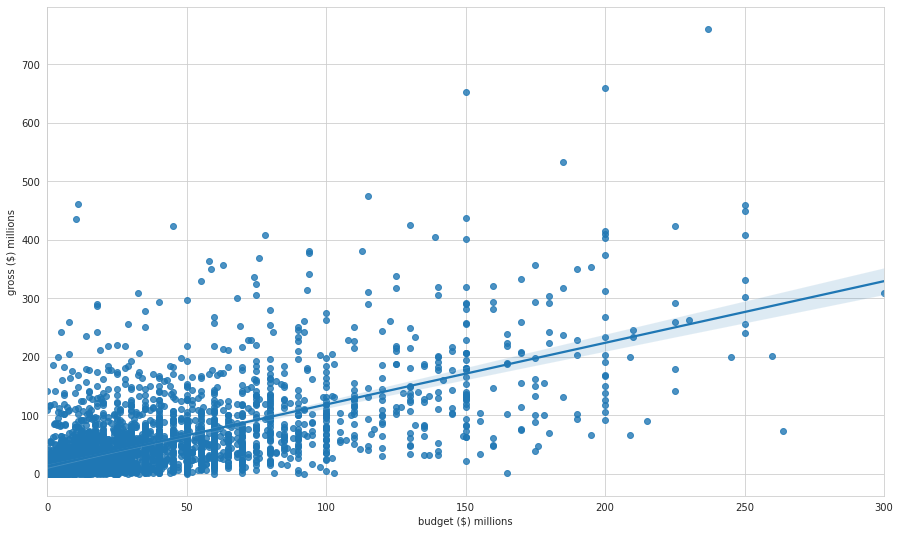

In [ ]:
#zooming in on gross vs budget

f, ax = plt.subplots(figsize=(15,9))

sns.regplot(x='budget ($) millions', y='gross ($) millions', data=movies,ax=ax)

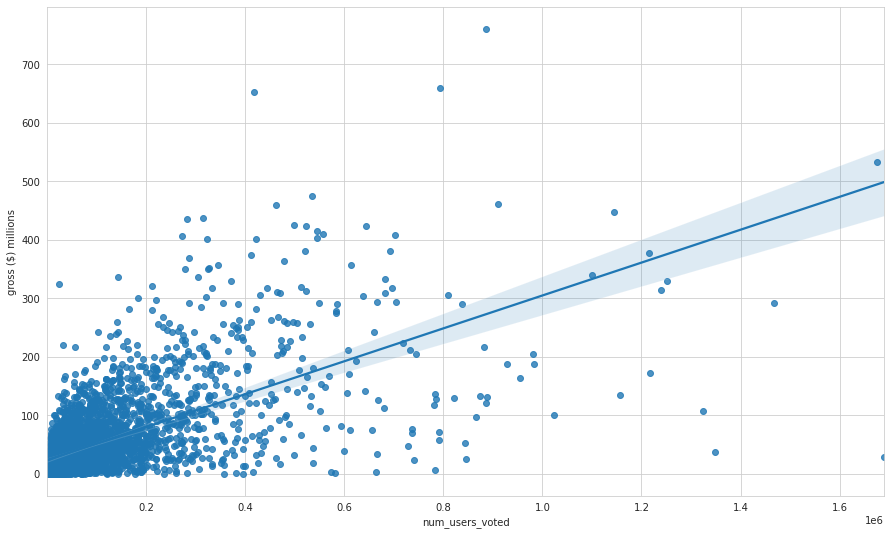

In [ ]:
#zooming in on gross vs num_users_voted

f, ax = plt.subplots(figsize=(15,9))
sns.regplot(x='num_users_voted', y='gross ($) millions', data=movies, ax=ax)

In [ ]:
#exploring top 12 grossing movies

movies[['movie_title', 'gross ($) millions','budget ($) millions','roi', 'genres', 'title_year']].sort_values(by='gross ($) millions',ascending=False)[:12]

,movie_title,gross ($) millions,budget ($) millions,roi,genres,title_year
0,Avatar,760.51,237.0,220.888543,Action,2009.0
22,Titanic,658.67,200.0,229.336151,Drama,1997.0
25,Jurassic World,652.18,150.0,334.784847,Action,2015.0
55,The Dark Knight,533.32,185.0,188.278952,Action,2008.0
211,Star Wars: Episode I - The Phantom Menace,474.54,115.0,312.647545,Action,1999.0
2515,Star Wars: Episode IV - A New Hope,460.94,11.0,4090.324227,Action,1977.0
6,Avengers: Age of Ultron,458.99,250.0,83.596640,Action,2015.0
3,The Dark Knight Rises,448.13,250.0,79.252257,Action,2012.0
514,Shrek 2,436.47,150.0,190.980691,Adventure,2004.0
2556,E.T. the Extra-Terrestrial,434.95,10.5,4042.375800,Family,1982.0


In [ ]:
movies[['movie_title', 'gross ($) millions','budget ($) millions','roi']].sort_values(by='gross ($) millions',ascending=False)[:12].describe()

,gross ($) millions,budget ($) millions,roi
count,12.000000,12.000000,12.000000
mean,513.865000,159.458333,840.594216
std,113.385715,83.258485,1509.000146
min,423.030000,10.500000,79.252257
25%,436.090000,126.250000,163.212839
50%,459.965000,167.500000,223.769493
75%,563.035000,228.000000,318.181871
max,760.510000,250.000000,4090.324227


In [ ]:
movies[['movie_title', 'gross','gross ($) millions','budget ($) millions','profit','roi']].sort_values(by='gross')[:5]

,movie_title,gross,gross ($) millions,budget ($) millions,profit,roi
2712,Skin Trade,162.0,0.0,9.0,-8999838.0,-99.998200
3292,The Jimmy Show,703.0,0.0,1.5,-1499297.0,-99.953133
3291,In Her Line of Fire,721.0,0.0,1.0,-999279.0,-99.927900
3382,The Trials of Darryl Hunt,1111.0,0.0,0.2,-198889.0,-99.444500
3342,Detention of the Dead,1332.0,0.0,0.5,-498668.0,-99.733600


**Exploring *budget***

- Mean value is 38.34M US dollars
- Median value is 25M US dollars
- There is an obvious rightward skew, Budget skewness score:  2.12
- Mean budget for titles older than year 1990 is 13.87M US dollars


**To 12 movies with the highest budget**

- Highest budget is Pirates of the Caribbean: At World's End 300M US dollars budget, and roi 3.13%
- Highest roi is Avatar 220%, with the budget of 237M US dollars
- Lowest budget is Tarnation 	with 218 US dollars budget, and a 592014.0 gross. Roi is 271466.05%
- 9 Action movies, and 3 Adventure

In [ ]:
movies['budget ($) millions'].describe()

count    3411.000000
mean       38.343055
std        41.655465
min         0.000000
25%        10.000000
50%        25.000000
75%        50.000000
max       300.000000
Name: budget ($) millions, dtype: float64

In [ ]:
# top 12 movies with the highest budget

movies[['movie_title', 'gross ($) millions','budget ($) millions','roi', 'genres']].sort_values(by='budget ($) millions',ascending=False)[:12]

,movie_title,gross ($) millions,budget ($) millions,roi,genres
1,Pirates of the Caribbean: At World's End,309.40,300.0,3.134717,Action
4,John Carter,73.06,263.7,-72.294775,Action
5,Tangled,200.81,260.0,-22.766438,Adventure
15,Pirates of the Caribbean: On Stranger Tides,241.06,250.0,-3.574450,Action
3,The Dark Knight Rises,448.13,250.0,79.252257,Action
6,Avengers: Age of Ultron,458.99,250.0,83.596640,Action
7,Harry Potter and the Half-Blood Prince,301.96,250.0,20.782792,Adventure
8,Batman v Superman: Dawn of Justice,330.25,250.0,32.099625,Action
23,Captain America: Civil War,407.20,250.0,62.878913,Action
17,The Hobbit: The Battle of the Five Armies,255.11,250.0,2.043348,Adventure


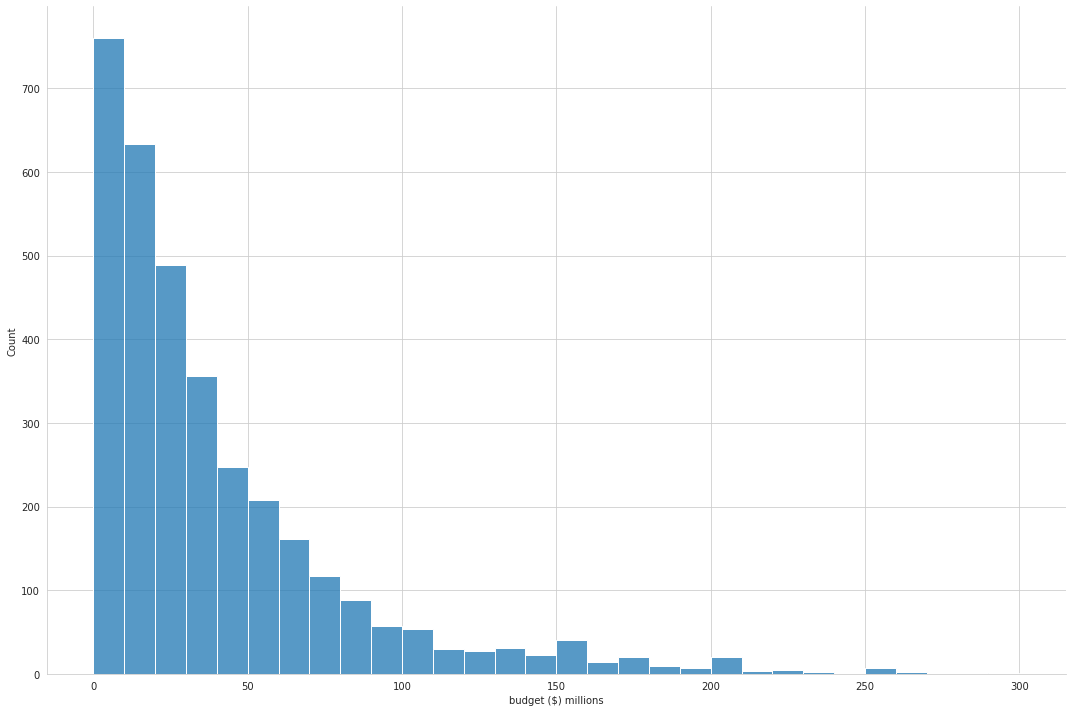

In [ ]:
#visualizing the distribution og the budget

sns.displot(data=movies, x='budget ($) millions',height=10,aspect=1.5, bins=30)

In [ ]:
print('Budget skewness score: ', movies['budget'].skew())

Budget skewness score:  2.1205679615057442


In [ ]:
#lowest budget 

movies[['movie_title', 'gross ($) millions','profit','roi', 'budget', 'genres']].sort_values(by='budget')[:5]

,movie_title,gross ($) millions,profit,roi,budget,genres
3353,Tarnation,0.59,591796.0,271466.055046,218.0,Biography
3410,My Date with Drew,0.09,84122.0,7647.454545,1100.0,Documentary
3409,Primer,0.42,417760.0,5968.000000,7000.0,Drama
3408,Pink Flamingos,0.18,170483.0,1704.830000,10000.0,Comedy
3192,London,0.01,-1333.0,-9.521429,14000.0,Drama


In [ ]:
#exploring budget values in certain years

year_less_1990 = movies[movies['title_year'] < 1990]
year_less_1990[['budget ($) millions', 'title_year']].describe()

,budget ($) millions,title_year
count,280.000000,280.000000
mean,13.879643,1979.553571
std,12.617258,11.776776
min,0.010000,1929.000000
25%,4.000000,1977.000000
50%,10.250000,1984.000000
75%,19.100000,1987.000000
max,69.500000,1989.000000


In [ ]:
year_1990_2016 = movies[movies['title_year'] >= 1990]
year_1990_2016[['budget ($) millions', 'title_year']].describe()

,budget ($) millions,title_year
count,3131.000000,3131.000000
mean,40.530776,2004.898754
std,42.636688,6.340823
min,0.000000,1990.000000
25%,12.000000,2000.000000
50%,26.000000,2005.000000
75%,55.000000,2010.000000
max,300.000000,2016.000000


**Exploring *roi***

- Mean values is 540.43%
- Median values is -49.13%
- Mean lies in the 90 percentile, huge difference which indicates a lot of extreme cases, low profitability in general
- Most of the distribution lies around 0, and there is an obvious sign of extreme cases.

**Top 12 movies with the highest roi**

- Top 3 highest roi movies are:
Paranormal Activity with 719348%, budget of 0.02M, and gross 107.92M, 
Tarnation with 271466% roi, and The Blair Witch Project with 234116% roi.
- Budgets do not exceed 2 million US dollars in the top 12.
- 5 Comedy movies, 3 Horror movies, 2 Drama movies, and 1 Biography and Animation

In [ ]:
#exploring the average roi of a movie

movies['roi'].describe()

count      3411.000000
mean        540.436995
std       13798.528944
min         -99.998200
25%         -49.133659
50%          13.906437
75%         126.012419
max      719348.553333
Name: roi, dtype: float64

In [ ]:
# Top 12 roi movies

movies[['movie_title', 'gross ($) millions','budget ($) millions','budget', 'roi', 'genres']].sort_values(by='roi',ascending=False)[:12]

,movie_title,gross ($) millions,budget ($) millions,budget,roi,genres
3351,Paranormal Activity,107.92,0.02,15000.0,719348.553333,Horror
3353,Tarnation,0.59,0.00,218.0,271466.055046,Biography
3317,The Blair Witch Project,140.53,0.06,60000.0,234116.856667,Horror
3401,The Brothers McMullen,10.25,0.02,25000.0,40886.400000,Comedy
3392,The Gallows,22.76,0.10,100000.0,22657.819000,Horror
3398,Super Size Me,11.53,0.06,65000.0,17637.489231,Comedy
3306,American Graffiti,115.00,0.78,777000.0,14700.514801,Comedy
3251,Rocky,117.24,0.96,960000.0,12112.004896,Drama
3406,In the Company of Men,2.86,0.02,25000.0,11326.488000,Comedy
3349,Napoleon Dynamite,44.54,0.40,400000.0,11035.239000,Comedy


In [ ]:
#top 12 movies with the highest roi statistics

movies[['movie_title', 'gross ($) millions','budget ($) millions','budget', 'roi', 'genres']].sort_values(by='roi',ascending=False)[:12].describe()

,gross ($) millions,budget ($) millions,budget,roi
count,12.000000,12.000000,1.200000e+01,12.000000
mean,64.026667,0.376667,3.772682e+05,114542.363102
std,64.823923,0.604218,6.035240e+05,211449.888271
min,0.590000,0.000000,2.180000e+02,9146.274250
25%,10.230000,0.020000,2.500000e+04,11253.675750
50%,33.650000,0.080000,8.250000e+04,16169.002016
75%,115.560000,0.495000,4.942500e+05,89194.014167
max,184.930000,2.000000,2.000000e+06,719348.553333


In [ ]:
#Top 5 lowest roi

movies[['movie_title', 'gross','profit','roi', 'budget', 'genres']].sort_values(by='roi')[:5]

,movie_title,gross,profit,roi,budget,genres
2712,Skin Trade,162.0,-8999838.0,-99.998200,9000000.0,Action
2198,Vamps,2964.0,-15997036.0,-99.981475,16000000.0,Comedy
1791,The Adventurer: The Curse of the Midas Box,4756.0,-24995244.0,-99.980976,25000000.0,Adventure
334,Spy Game,26871.0,-91973129.0,-99.970792,92000000.0,Action
2674,The Oxford Murders,3607.0,-9996393.0,-99.963930,10000000.0,Crime


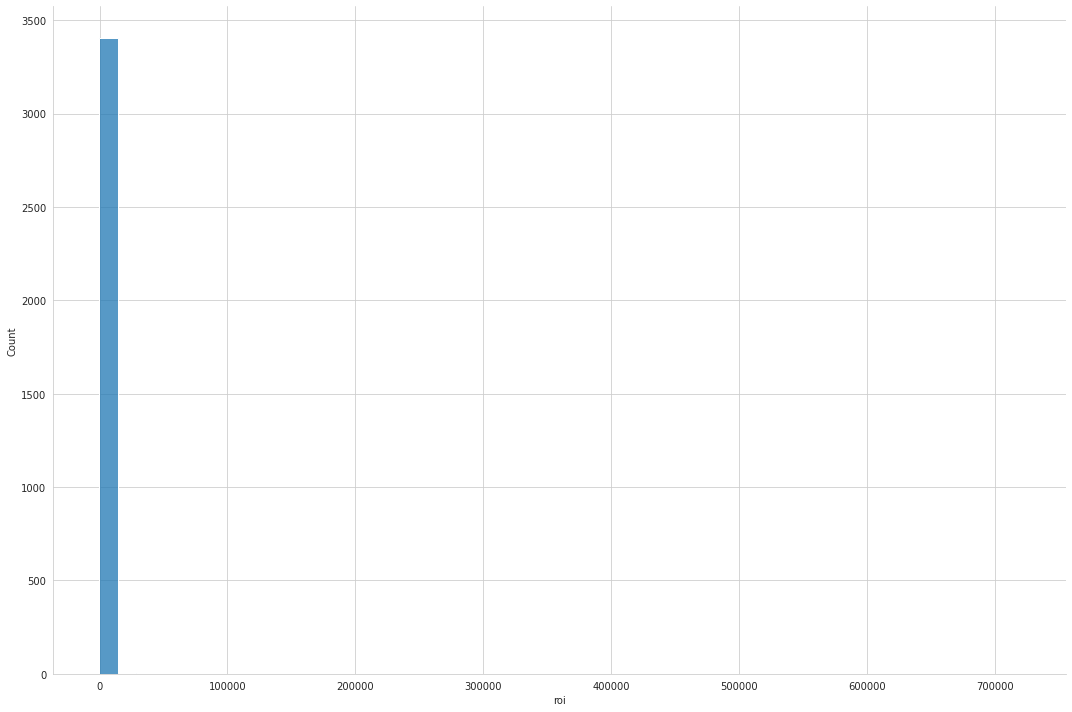

In [ ]:
#visualizing distribution of roi

sns.displot(data=movies, x = 'roi',height=10,aspect=1.5, bins=50)

**Exploring number of users voted, number of reviews, number of critic reviews**

In [ ]:
#basic statistics

movies[['num_users_voted', 'num_critic_reviews', 'num_user_reviews']].describe()

,num_users_voted,num_critic_reviews,num_user_reviews
count,3.411000e+03,3411.000000,3411.000000
mean,1.053070e+05,162.989153,330.043096
std,1.539382e+05,122.148744,405.297135
min,9.100000e+01,2.000000,4.000000
25%,1.904300e+04,75.000000,108.000000
50%,5.311500e+04,133.000000,207.000000
75%,1.270755e+05,218.000000,393.500000
max,1.689764e+06,813.000000,5060.000000


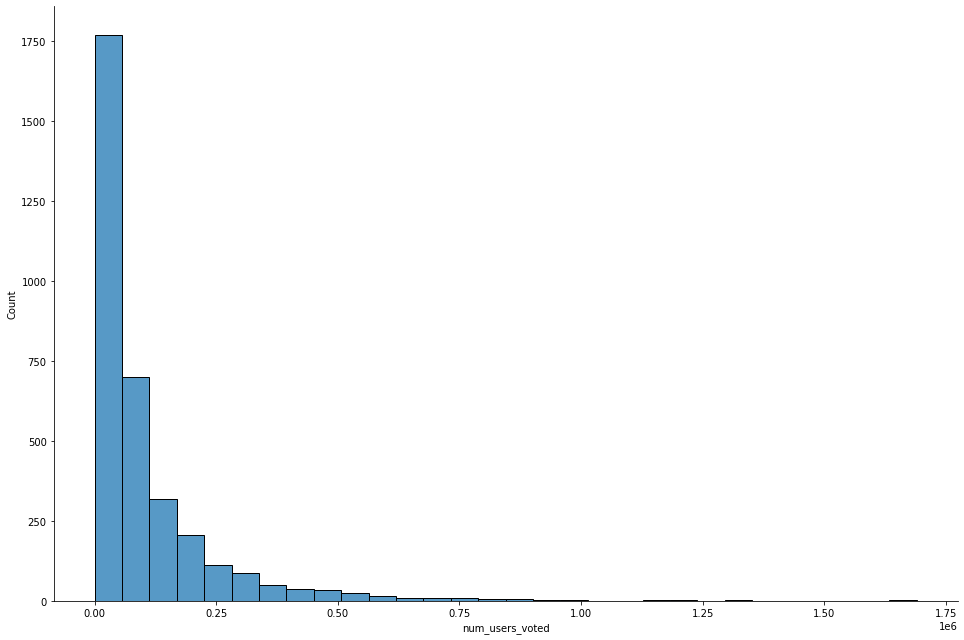

In [ ]:
#plotting num_users_voted

sns.displot(movies['num_users_voted'],height=9,aspect=1.5, bins=30)

In [5]:
#top 12 movies with the highest number of users voted

movies[['movie_title','num_users_voted', 'num_critic_reviews', 'num_user_reviews', 
        'gross ($) millions', 'budget ($) millions', 'roi', 'genres']].sort_values(by='num_users_voted', ascending=False)[:12]

,movie_title,num_users_voted,num_critic_reviews,num_user_reviews,gross ($) millions,budget ($) millions,roi,genres
1700,The Shawshank Redemption,1689764,199.0,4144.0,28.34,25.0,13.365876,Crime
55,The Dark Knight,1676169,645.0,4667.0,533.32,185.0,188.278952,Action
84,Inception,1468200,642.0,2803.0,292.57,160.0,82.855532,Action
606,Fight Club,1347461,315.0,2968.0,37.02,63.0,-41.232706,Drama
2722,Pulp Fiction,1324680,215.0,2195.0,107.93,8.0,1249.125000,Crime
742,Forrest Gump,1251222,149.0,1398.0,329.69,55.0,499.438538,Comedy
237,The Lord of the Rings: The Fellowship of the R...,1238746,297.0,5060.0,313.84,93.0,237.459760,Action
580,The Matrix,1217752,313.0,3646.0,171.38,63.0,172.036910,Action
294,The Lord of the Rings: The Return of the King,1215718,328.0,3189.0,377.02,94.0,301.084311,Action
2789,The Godfather,1155770,208.0,2238.0,134.82,6.0,2147.032533,Crime


In [ ]:
#basic statistics for the top 12 movies with the highest number of users voted

movies[['movie_title','num_users_voted', 'num_critic_reviews', 'num_user_reviews', 
        'gross ($) millions', 'budget ($) millions', 'roi']].sort_values(by='num_users_voted', ascending=False)[:12].describe()

,num_users_voted,num_critic_reviews,num_user_reviews,gross ($) millions,budget ($) millions,roi
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1.319189e+06,368.166667,3118.833333,259.545000,91.333333,432.575713
std,1.965632e+05,211.769958,1082.043591,162.121293,73.997952,637.459737
min,1.100446e+06,149.000000,1398.000000,28.340000,6.000000,-41.232706
25%,1.200731e+06,213.250000,2372.250000,128.097500,47.500000,81.954713
50%,1.244984e+06,305.000000,2885.500000,303.205000,78.000000,212.869356
75%,1.377646e+06,406.500000,3770.500000,349.615000,110.500000,350.672868
max,1.689764e+06,813.000000,5060.000000,533.320000,250.000000,2147.032533


**Exploring Social Media popularity**

In [ ]:
#basic statistics

movies[['movie_title','budget ($) millions', 'gross ($) millions', 'roi',
        'actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes',
        'movie_facebook_likes','cast_total_facebook_likes','num_user_reviews']].describe()

,budget ($) millions,gross ($) millions,roi,actor_1_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,cast_total_facebook_likes,num_user_reviews
count,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000
mean,38.343055,53.060504,540.436995,7873.299326,2021.556728,9053.851656,11655.384931,330.043096
std,41.655465,68.988365,13798.528944,15962.402314,4560.306314,21684.736120,19390.072589,405.297135
min,0.000000,0.000000,-99.998200,0.000000,0.000000,0.000000,0.000000,4.000000
25%,10.000000,9.595000,-49.133659,773.000000,403.000000,0.000000,2019.500000,108.000000
50%,25.000000,30.980000,13.906437,1000.000000,700.000000,204.000000,4251.000000,207.000000
75%,50.000000,68.285000,126.012419,13000.000000,979.000000,10000.000000,16341.500000,393.500000
max,300.000000,760.510000,719348.553333,640000.000000,137000.000000,349000.000000,656730.000000,5060.000000


In [ ]:
#top 12 movies with the highest number of movie Facebook likes

movies[['movie_title','movie_facebook_likes','budget ($) millions', 'gross ($) millions', 'roi',
        'actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes',
        'num_user_reviews', 'genres']].sort_values(by='movie_facebook_likes', ascending=False)[:12]

,movie_title,movie_facebook_likes,budget ($) millions,gross ($) millions,roi,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,num_user_reviews,genres
83,Interstellar,349000,165.0,187.99,13.934205,Matthew McConaughey,11000.0,Anne Hathaway,11000.0,2725.0,Adventure
258,Django Unchained,199000,100.0,162.80,62.804648,Leonardo DiCaprio,29000.0,Christoph Waltz,11000.0,1193.0,Drama
8,Batman v Superman: Dawn of Justice,197000,250.0,330.25,32.099625,Henry Cavill,15000.0,Lauren Cohan,4000.0,3018.0,Action
113,Mad Max: Fury Road,191000,150.0,153.63,2.419657,Tom Hardy,27000.0,Charlize Theron,9000.0,1588.0,Action
158,The Revenant,190000,135.0,183.64,36.026609,Leonardo DiCaprio,29000.0,Tom Hardy,27000.0,1188.0,Adventure
84,Inception,175000,160.0,292.57,82.855532,Leonardo DiCaprio,29000.0,Tom Hardy,27000.0,2803.0,Action
85,The Hobbit: An Unexpected Journey,166000,180.0,303.00,68.334016,Aidan Turner,5000.0,Adam Brown,972.0,1367.0,Adventure
2213,The Imitation Game,165000,14.0,91.12,550.867514,Benedict Cumberbatch,19000.0,Rory Kinnear,393.0,608.0,Biography
3,The Dark Knight Rises,164000,250.0,448.13,79.252257,Tom Hardy,27000.0,Christian Bale,23000.0,2701.0,Action
244,The Martian,153000,108.0,228.43,111.510179,Matt Damon,13000.0,Donald Glover,801.0,1023.0,Adventure


In [ ]:
#basic statistics foe the top 12 movies with the highest number of movie Facebook likes

movies[['movie_title','movie_facebook_likes','budget ($) millions', 'gross ($) millions', 'roi',
        'actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes',
        'num_user_reviews']].sort_values(by='movie_facebook_likes', ascending=False)[:12].describe()

,movie_facebook_likes,budget ($) millions,gross ($) millions,roi,actor_1_facebook_likes,actor_2_facebook_likes,num_user_reviews
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,187333.333333,140.583333,257.734167,125.932015,18333.333333,9763.833333,1679.000000
std,54002.244622,73.094532,164.772570,159.695322,9660.917831,10395.591451,883.058837
min,149000.000000,14.000000,59.070000,2.419657,3000.000000,393.000000,608.000000
25%,161250.000000,106.000000,160.507500,35.044863,12500.000000,993.000000,1146.750000
50%,170500.000000,150.000000,208.210000,73.793136,17000.000000,6500.000000,1328.500000
75%,192500.000000,168.750000,309.812500,117.706407,27500.000000,14000.000000,2707.000000
max,349000.000000,250.000000,652.180000,550.867514,29000.000000,27000.000000,3018.000000


In [ ]:
#top 12 movies with the highest number of likes for Actor 1

movies[['movie_title','budget ($) millions', 'gross ($) millions', 'roi',
        'actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes',
        'movie_facebook_likes','num_user_reviews']].sort_values(by='actor_1_facebook_likes', ascending=False)[:12]

,movie_title,budget ($) millions,gross ($) millions,roi,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,movie_facebook_likes,num_user_reviews
1667,Anchorman: The Legend of Ron Burgundy,26.0,84.14,223.603496,Darcy Donavan,640000.0,Will Ferrell,8000.0,0,577.0
3283,Hardflip,1.0,0.10,-90.326600,Matthew Ziff,260000.0,Randy Wayne,984.0,706,5.0
1092,The Final Destination,40.0,66.47,66.165930,Krista Allen,164000.0,Andrew Fiscella,137000.0,0,290.0
1959,Armored,27.0,15.99,-40.781941,Andrew Fiscella,137000.0,Fred Ward,459.0,0,110.0
2462,Quarantine,12.0,31.69,164.098425,Andrew Fiscella,137000.0,Jay Hernandez,1000.0,0,369.0
63,Evan Almighty,175.0,100.29,-42.691606,Jimmy Bennett,87000.0,Morgan Freeman,11000.0,2000,257.0
488,Hostage,52.0,34.64,-33.391456,Jimmy Bennett,87000.0,Bruce Willis,13000.0,0,288.0
1936,Shorts,40.0,20.92,-47.709227,Jimmy Bennett,87000.0,Leo Howard,570.0,431,37.0
868,Firewall,50.0,48.75,-2.509700,Jimmy Bennett,87000.0,Harrison Ford,11000.0,773,306.0
90,Poseidon,160.0,60.66,-62.090311,Jimmy Bennett,87000.0,Mike Vogel,2000.0,0,629.0


In [ ]:
#basic statistics foe the top 12 movies with the highest number of likes for Actor 1

movies[['movie_title','budget ($) millions', 'gross ($) millions', 'roi',
        'actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes',
        'movie_facebook_likes','num_user_reviews']].sort_values(by='actor_1_facebook_likes', ascending=False)[:12].describe()

,budget ($) millions,gross ($) millions,roi,actor_1_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,num_user_reviews
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,50.333333,43.996667,22.930067,162250.000000,16899.500000,356.750000,284.000000
std,57.320999,32.207389,120.646012,159178.644639,38272.939164,594.835367,214.452792
min,1.000000,0.050000,-97.391700,87000.000000,459.000000,0.000000,5.000000
25%,17.250000,19.687500,-51.304498,87000.000000,933.250000,0.000000,91.750000
50%,33.500000,41.695000,-37.086698,87000.000000,5000.000000,0.000000,289.000000
75%,50.500000,64.812500,90.649054,143750.000000,11500.000000,499.750000,406.250000
max,175.000000,100.290000,238.185489,640000.000000,137000.000000,2000.000000,629.000000


In [ ]:
#cast_total_facebook_likes

movies[['movie_title','budget ($) millions', 'gross ($) millions', 'roi',
        'actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes',
        'movie_facebook_likes','cast_total_facebook_likes','num_user_reviews']].sort_values(by='cast_total_facebook_likes', ascending=False)[:12]

,movie_title,budget ($) millions,gross ($) millions,roi,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,movie_facebook_likes,cast_total_facebook_likes,num_user_reviews
1667,Anchorman: The Legend of Ron Burgundy,26.0,84.14,223.603496,Darcy Donavan,640000.0,Will Ferrell,8000.0,0,656730,577.0
1092,The Final Destination,40.0,66.47,66.165930,Krista Allen,164000.0,Andrew Fiscella,137000.0,0,303717,290.0
3283,Hardflip,1.0,0.10,-90.326600,Matthew Ziff,260000.0,Randy Wayne,984.0,706,263584,5.0
2462,Quarantine,12.0,31.69,164.098425,Andrew Fiscella,137000.0,Jay Hernandez,1000.0,0,140268,369.0
1959,Armored,27.0,15.99,-40.781941,Andrew Fiscella,137000.0,Fred Ward,459.0,0,137712,110.0
2042,The Amityville Horror,19.0,64.26,238.185489,Jimmy Bennett,87000.0,Chloë Grace Moretz,17000.0,0,120797,518.0
63,Evan Almighty,175.0,100.29,-42.691606,Jimmy Bennett,87000.0,Morgan Freeman,11000.0,2000,108016,257.0
3,The Dark Knight Rises,250.0,448.13,79.252257,Tom Hardy,27000.0,Christian Bale,23000.0,164000,106759,2701.0
488,Hostage,52.0,34.64,-33.391456,Jimmy Bennett,87000.0,Bruce Willis,13000.0,0,103354,288.0
868,Firewall,50.0,48.75,-2.509700,Jimmy Bennett,87000.0,Harrison Ford,11000.0,773,101383,306.0


In [ ]:
#statistics

movies[['movie_title','budget ($) millions', 'gross ($) millions', 'roi',
        'actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes',
        'movie_facebook_likes','cast_total_facebook_likes','num_user_reviews']].sort_values(by='cast_total_facebook_likes', ascending=False)[:12].describe()

,budget ($) millions,gross ($) millions,roi,actor_1_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,cast_total_facebook_likes,num_user_reviews
count,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,88.500000,117.84250,48.592552,152166.666667,20453.583333,23789.916667,185564.666667,597.250000
std,93.397002,159.27431,112.650985,165975.810578,37524.525414,55623.388103,163505.108099,722.024191
min,1.000000,0.10000,-90.326600,26000.000000,459.000000,0.000000,92000.000000,5.000000
25%,24.250000,33.90250,-41.259357,87000.000000,1750.000000,0.000000,102861.250000,280.250000
50%,45.000000,62.46000,31.828115,87000.000000,11000.000000,0.000000,114406.500000,337.500000
75%,163.750000,88.17750,103.722086,143750.000000,18000.000000,1079.750000,171097.000000,590.000000
max,250.000000,458.99000,238.185489,640000.000000,137000.000000,164000.000000,656730.000000,2701.000000


# **Saving/Loading Cleaned Data for modeling**

In [ ]:
movies_clean = movies.copy()
movies_clean.head(1)

,num_critic_reviews,duration,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_users_voted,cast_total_facebook_likes,num_user_reviews,language,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,profit,roi,genres_Action,genres_Comedy,content_rating_PG-13,content_rating_R
0,723.0,178.0,Joel David Moore,1000.0,760505847.0,Action,CCH Pounder,Avatar,886204,4834,3054.0,English,PG-13,237000000.0,2009.0,936.0,7.9,33000,237.0,760.51,523505847.0,220.888543,1,0,1,0


In [ ]:
#saving to a csv and downloading it

movies_clean.to_csv('movies_clean.csv') 
files.download('movies_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
#loading it for modeling

movies_uploaded = files.upload()

Saving movies_clean.csv to movies_clean.csv


In [4]:
movies = pd.read_csv('movies_clean.csv')

# **Modeling**

**Feature Scaling**

- Data shows significant difference in scales, as well as outliers: which can affect the predictions of the model.
- **Action taken**: Scikit-Learn StandardScaler will scale the data to a mean zero, and is much less affected by outliers (compared to MinMaxScaler). I find it appropriate to use in this situation.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
movies_num = movies.select_dtypes(include=['float64', 'int64']).copy()
movies_scaled = pd.DataFrame(scaler.fit_transform(movies_num), columns=movies_num.columns)
movies_scaled.drop(columns='Unnamed: 0', inplace=True)
movies_scaled.head()

,num_critic_reviews,duration,actor_1_facebook_likes,gross,num_users_voted,cast_total_facebook_likes,num_user_reviews,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,budget ($) millions,gross ($) millions,profit,roi,genres_Action,genres_Comedy,content_rating_PG-13,content_rating_R
0,4.585335,3.051733,-0.430656,10.256083,5.073539,-0.351849,6.721874,4.769749,0.628829,-0.238080,1.403808,1.104448,4.769748,10.256124,9.486509,-0.023162,1.726315,-0.619494,1.36704,-0.904025
1,1.138213,2.648843,2.012943,3.716304,2.377361,1.892721,2.240554,6.282378,0.425383,0.653219,0.643852,-0.417583,6.282376,3.716237,-0.097245,-0.038945,1.726315,-0.619494,1.36704,-0.904025
2,3.594595,1.708767,0.195908,2.131309,1.108146,0.002301,1.638438,4.961829,1.239168,-0.357168,0.358868,3.502800,4.961828,2.131244,-1.110051,-0.040501,1.726315,-0.619494,1.36704,-0.904025
3,5.322250,2.425016,1.198410,5.727470,6.750646,4.905477,5.850780,5.081879,0.933999,4.600901,1.973776,7.146449,5.081878,5.727450,3.420947,-0.033428,1.726315,-0.619494,1.36704,-0.904025
4,2.448283,0.992519,-0.453212,0.289921,0.694517,-0.504579,1.006710,5.410815,0.933999,-0.304752,0.168879,0.689348,5.410814,0.289939,-3.826443,-0.044412,1.726315,-0.619494,1.36704,-0.904025


**Train Test Split**

In [ ]:
movies_scaled.columns

Index(['num_critic_reviews', 'duration', 'actor_1_facebook_likes', 'gross',
       'num_users_voted', 'cast_total_facebook_likes', 'num_user_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes', 'movie_score',
       'movie_facebook_likes', 'budget ($) millions', 'gross ($) millions',
       'profit', 'roi', 'genres_Action', 'genres_Comedy',
       'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [ ]:
X = movies_scaled.drop(['gross', 'budget ($) millions', 'gross ($) millions', 'profit', 'roi'], axis=1)
y = movies_scaled['gross']

In [ ]:
X.head()

,num_critic_reviews,duration,actor_1_facebook_likes,num_users_voted,cast_total_facebook_likes,num_user_reviews,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,genres_Action,genres_Comedy,content_rating_PG-13,content_rating_R
0,4.585335,3.051733,-0.430656,5.073539,-0.351849,6.721874,4.769749,0.628829,-0.238080,1.403808,1.104448,1.726315,-0.619494,1.36704,-0.904025
1,1.138213,2.648843,2.012943,2.377361,1.892721,2.240554,6.282378,0.425383,0.653219,0.643852,-0.417583,1.726315,-0.619494,1.36704,-0.904025
2,3.594595,1.708767,0.195908,1.108146,0.002301,1.638438,4.961829,1.239168,-0.357168,0.358868,3.502800,1.726315,-0.619494,1.36704,-0.904025
3,5.322250,2.425016,1.198410,6.750646,4.905477,5.850780,5.081879,0.933999,4.600901,1.973776,7.146449,1.726315,-0.619494,1.36704,-0.904025
4,2.448283,0.992519,-0.453212,0.694517,-0.504579,1.006710,5.410815,0.933999,-0.304752,0.168879,0.689348,1.726315,-0.619494,1.36704,-0.904025


In [ ]:
X.columns

Index(['num_critic_reviews', 'duration', 'actor_1_facebook_likes',
       'num_users_voted', 'cast_total_facebook_likes', 'num_user_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes', 'movie_score',
       'movie_facebook_likes', 'genres_Action', 'genres_Comedy',
       'content_rating_PG-13', 'content_rating_R'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,num_critic_reviews,duration,actor_1_facebook_likes,num_users_voted,cast_total_facebook_likes,num_user_reviews,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,genres_Action,genres_Comedy,content_rating_PG-13,content_rating_R
1674,0.876198,-0.037088,1.010441,-0.021635,0.772138,-0.417146,-0.320367,0.933999,-0.281943,0.073885,-0.417583,1.726315,-0.619494,-0.731508,1.106164
1213,-0.630383,0.902988,-0.368000,-0.575861,-0.334931,-0.703397,0.039783,0.527106,-0.246414,0.833841,-0.417583,-0.579269,-0.619494,-0.731508,-0.904025
2874,-0.614007,-0.932398,-0.473200,-0.491490,-0.571066,-0.254278,-0.728536,-1.405635,-0.421208,-1.256039,-0.371461,-0.579269,-0.619494,-0.731508,-0.904025
994,1.310159,0.410567,1.323723,0.307207,2.178734,0.207179,-0.080267,0.527106,2.627060,0.833841,-0.417583,-0.579269,-0.619494,-0.731508,1.106164
464,0.008277,0.231505,-0.440994,0.577862,-0.507570,-0.190118,1.000182,0.323659,-0.313963,0.453863,-0.417583,1.726315,-0.619494,-0.731508,-0.904025


# **Linear Regression**

In [ ]:
#fitting Linear Regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#intercept
print(lin_reg.intercept_)

-0.004262690238618612


In [ ]:
#printing the coefficients

coef_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeff'])
coef_df

,Coeff
num_critic_reviews,0.094131
duration,-0.042153
actor_1_facebook_likes,-0.497783
num_users_voted,0.386619
cast_total_facebook_likes,0.538304
num_user_reviews,-0.011349
budget,0.419818
title_year,-0.093898
actor_2_facebook_likes,-0.118277
movie_score,0.043347


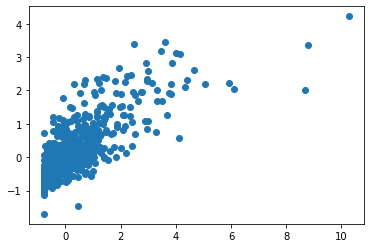

In [ ]:
#predictions

predictions = lin_reg.predict(X_test)

plt.scatter(y_test, predictions)

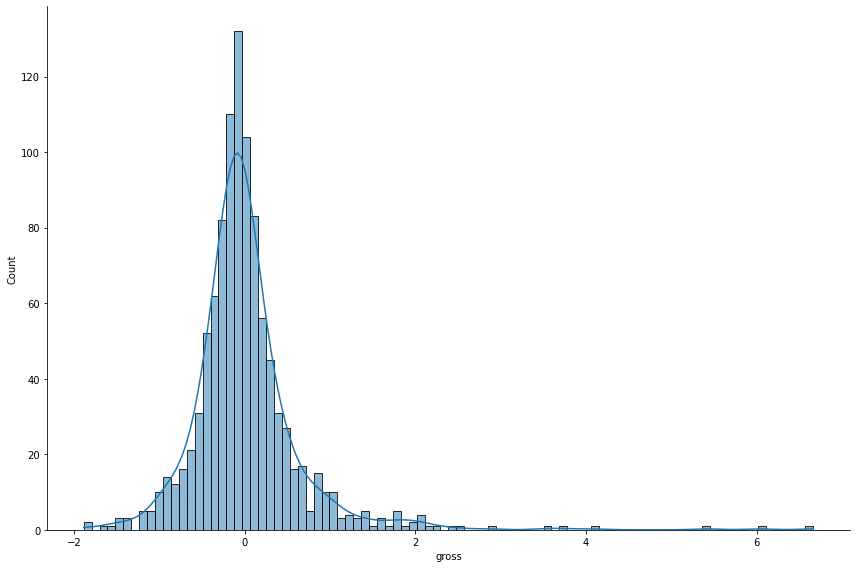

In [ ]:
#plotting residuals

sns.displot((y_test - predictions), height=8, aspect=1.5,kde=True)

In [ ]:
#metrics

from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  0.3948102494290875
MSE:  0.4391046975012708
RMSE:  0.6626497547734178


In [ ]:
#using statsmodels for additional metrics

import statsmodels.formula.api as smf

results = smf.ols('gross ~ num_critic_reviews + duration + actor_1_facebook_likes + num_users_voted + cast_total_facebook_likes + num_user_reviews + budget + title_year + actor_2_facebook_likes + movie_score + movie_facebook_likes', data=movies_scaled).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     437.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:52:48   Log-Likelihood:                -3334.6
No. Observations:                3411   AIC:                             6693.
Df Residuals:                    3399   BIC:                             6767.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  4.012e-17      0.011   3.64e-15      1.000      -0.022       0.022
num_critic_reviews            0.0280      0.020      1.386      0.166      -0.012       0.068
duration                     -0.0622      0.013     -4.824      0.000      -0.088      -0.037
actor_1_facebook_likes       -0.4802      0.072     -6.677      0.000      -0.621      -0.339
num_users_voted               0.4107      0.021     19.387      0.000       0.369       0.452
cast_total_facebook_likes     0.5552      0.086      6.483      0.000       0.387       0.723
num_user_reviews              0.0274      0.019      1.428      0.153      -0.010       0.065
budget                        0.4750      0.014     35.063      0.000       0.448       0.502
title_year                   -0.0997      0.014     -7.282      0.000      -0.127      -0.073
actor_2_facebook_likes       -0.1465      0.029     -5.092      0.000      -0.203      -0.090
movie_score                   0.0118      0.014      0.832      0.405      -0.016       0.040
movie_facebook_likes         -0.0108      0.016     -0.660      0.509      -0.043       0.021
==============================================================================
Omnibus:                     1588.739   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27295.913
Skew:                           1.780   Prob(JB):                         0.00
Kurtosis:                      16.393   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Random Forest Regressor**



In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_reg = RandomForestRegressor(n_estimators=220)

In [ ]:
random_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=220, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Predictions**

In [ ]:
predictions = random_reg.predict(X_test)

In [ ]:
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.37 degrees.


In [ ]:
# mean absolute percentage error (MAPE)

mape = 100 * (errors / y_test)

# calculate and display accuracy

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 207.41 %.


In [ ]:
from sklearn import metrics

print('Mean Squared Error (MSE):', metrics.mean_squared_error(predictions, y_test))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(predictions, y_test)))


Mean Squared Error (MSE): 0.4391046975012708
Root Mean Squared Error (RMSE): 0.6626497547734178


In [ ]:
random_reg.score(X_test, y_test)

0.6654288798291677

**Feature importance**

In [ ]:
feat_importances = list(random_reg.feature_importances_)
feat_importances


[0.03421607033064801,
 0.03483531600069474,
 0.018296882920864916,
 0.491052610408473,
 0.03183764271227134,
 0.03302927102989685,
 0.17200521879986597,
 0.039983525412822234,
 0.019791584935930764,
 0.028516949878288247,
 0.023886377136485164,
 0.005009358905911698,
 0.00497747994819478,
 0.007038278031845895,
 0.05552343354780645]

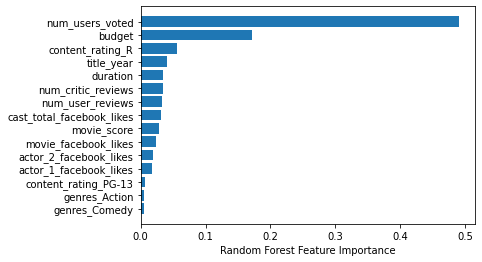

In [ ]:
sorted_idx = random_reg.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], random_reg.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");

**Trying different number of estimators**

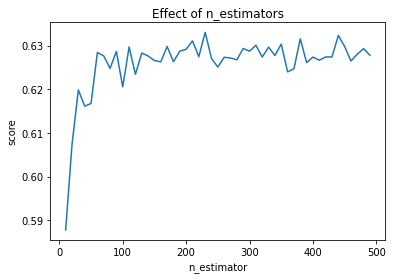

In [ ]:
estimators = np.arange(10, 500, 10)
scores = []
for n in estimators:
    random_reg.set_params(n_estimators=n)
    random_reg.fit(X_train, y_train)
    scores.append(random_reg.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)